# Assignment 8: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 5, 10, 50], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`</li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
   <li><b>Task 2: </b>For this task consider set-1 features. Select all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_` 
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  Note: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  </li>
    <br>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

In [0]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

D:\installed\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

<h1>1. Decision Tree </h1>

## 1.1 Loading Data

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
data  = pd.read_csv('gdrive/My Drive/Assignment-5/preprocessed_data.csv')
project  = pd.read_csv('gdrive/My Drive/Assignment-5/train_data.csv')

data.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [0]:

project.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1


In [0]:
stopwords=stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [0]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
project['project_title'].head(5)#preprocessing title feature

0     Educational Support for English Learners at Home
1                Wanted: Projector for Hungry Learners
2    Soccer Equipment for AWESOME Middle School Stu...
3                               Techie Kindergarteners
4                               Interactive Math Tools
Name: project_title, dtype: object

In [0]:
from tqdm import tqdm#preprocessing title feature
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [0]:
preprocessed_titles=preprocess_text(project['project_title'])

100%|██████████| 109248/109248 [00:02<00:00, 41504.23it/s]


In [0]:
preprocessed_titles[:5]

['educational support english learners home',
 'wanted projector hungry learners',
 'soccer equipment awesome middle school students',
 'techie kindergarteners',
 'interactive math tools']

In [0]:
data['project_title']=preprocessed_titles

In [0]:
data.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,project_title
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05,educational support english learners home
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03,wanted projector hungry learners
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00,soccer equipment awesome middle school students
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04,techie kindergarteners
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74,interactive math tools


In [0]:
data.shape

(109248, 10)

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import re

import pickle
from tqdm import tqdm
import os

from chart_studio import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

Output hidden; open in https://colab.research.google.com to view.

In [0]:
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price,project_title
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05,educational support english learners home


In [0]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109248 entries, 0 to 109247
Data columns (total 9 columns):
school_state                                    109248 non-null object
teacher_prefix                                  109248 non-null object
project_grade_category                          109248 non-null object
teacher_number_of_previously_posted_projects    109248 non-null int64
clean_categories                                109248 non-null object
clean_subcategories                             109248 non-null object
essay                                           109248 non-null object
price                                           109248 non-null float64
project_title                                   109248 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 7.5+ MB


In [0]:
X.describe()

,teacher_number_of_previously_posted_projects,price
count,109248.000000,109248.000000
mean,11.153165,298.119343
std,27.777154,367.498030
min,0.000000,0.660000
25%,0.000000,104.310000
50%,2.000000,206.220000
75%,9.000000,379.000000
max,451.000000,9999.000000


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(73196, 9) (73196,)
(36052, 9) (36052,)


In [0]:
words=[]
for i in X_train['essay']:
    for word in i.split():
        if word not in words:
            words.append(word)
print('number of unique words',len(words))

number of unique words 48171


In [0]:
words=[]
for i in X_train['project_title']:
    for word in i.split():
        if word not in words:
            words.append(word)
print('number of unique words',len(words))

number of unique words 14011


<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

TFIDF for essay n titles

In [0]:
import time
start=time.clock()
from sklearn.feature_extraction.text import TfidfVectorizer

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print("="*100)


vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizer.transform(X_train['essay'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)
print('time taken',time.clock()-start)

(73196, 9) (73196,)
(36052, 9) (36052,)
After vectorizations
(73196, 5000) (73196,)
(36052, 5000) (36052,)
time taken 210.76515600000002


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
import time
start=time.clock()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print("="*100)


vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['project_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_title_tfidf = vectorizer.transform(X_train['project_title'].values)
X_test_title_tfidf = vectorizer.transform(X_test['project_title'].values)

print("After vectorizations")
print(X_train_title_tfidf.shape, y_train.shape)
print(X_train_title_tfidf.shape, y_test.shape)
print("="*100)
print('time taken',time.clock()-start)

(73196, 9) (73196,)
(36052, 9) (36052,)
After vectorizations
(73196, 4858) (73196,)
(73196, 4858) (36052,)
time taken 6.6180920000000185


TFIDF_W2V

essay

In [0]:
import pickle
with open('gdrive/My Drive/Assignment-5/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [0]:
start=time.clock()

tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'])
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())
print('time taken',time.clock()-start)

time taken 7.947437000000008


In [0]:
train_essay_tfidf_w2v_vectors = []; 
for sentence in tqdm(X_train['essay']):
    vector = np.zeros(300) 
    tf_idf_weight =0; 
    for word in sentence.split(): 
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] 
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_essay_tfidf_w2v_vectors.append(vector)

print(len(train_essay_tfidf_w2v_vectors))
print(len(train_essay_tfidf_w2v_vectors[0]))


100%|██████████| 73196/73196 [02:43<00:00, 447.49it/s]

73196
300


In [0]:
print(len(train_essay_tfidf_w2v_vectors))

73196


In [0]:
test_essay_tfidf_w2v_vectors=[]

for sentence in tqdm(X_test['essay']):
  vector=np.zeros(300)
  tf_weight=0
  for word in sentence.split(): 
    if (word in glove_words) and(word in tfidf_words):
      vec=model[word]
      tf_idf=dictionary[word]*(sentence.count(word)/len(sentence.split()))
      vector+=vec*tf_idf
      tf_weight+=tf_idf
  if tf_weight!=0:
    vector/=tf_weight
  test_essay_tfidf_w2v_vectors.append(vector)

print(len(test_essay_tfidf_w2v_vectors))
print(len(test_essay_tfidf_w2v_vectors[0]))

100%|██████████| 36052/36052 [01:22<00:00, 438.97it/s]

36052
300


In [0]:
print(len(test_essay_tfidf_w2v_vectors))


36052


Title

In [0]:
test_title_tfidf_w2v_vectors=[]

for sentence in tqdm(X_test['project_title']):
  vector=np.zeros(300)
  tf_weight=0
  for word in sentence.split(): 
    if (word in glove_words) and(word in tfidf_words):
      vec=model[word]
      tf_idf=dictionary[word]*(sentence.count(word)/len(sentence.split()))
      vector+=vec*tf_idf
      tf_weight+=tf_idf
  if tf_weight!=0:
    vector/=tf_weight
  test_title_tfidf_w2v_vectors.append(vector)

print(len(test_title_tfidf_w2v_vectors))
print(len(test_title_tfidf_w2v_vectors[0]))

100%|██████████| 36052/36052 [00:01<00:00, 27167.36it/s]

36052
300


In [0]:
train_title_tfidf_w2v_vectors=[]

for sentence in tqdm(X_train['project_title']):
  vector=np.zeros(300)
  tf_weight=0
  for word in sentence.split(): 
    if (word in glove_words) and(word in tfidf_words):
      vec=model[word]
      tf_idf=dictionary[word]*(sentence.count(word)/len(sentence.split()))
      vector+=vec*tf_idf
      tf_weight+=tf_idf
  if tf_weight!=0:
    vector/=tf_weight
  train_title_tfidf_w2v_vectors.append(vector)

print(len(train_title_tfidf_w2v_vectors))
print(len(train_title_tfidf_w2v_vectors[0]))

100%|██████████| 73196/73196 [00:03<00:00, 23616.83it/s]

73196
300


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

Schoo_state

In [0]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(73196, 51) (73196,)
(36052, 51) (36052,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


Project Grade

In [0]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(73196, 4) (73196,)
(36052, 4) (36052,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


Teacher prefix

In [0]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(73196, 5) (73196,)
(36052, 5) (36052,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


clean_categories

In [0]:
vectorizer=CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values)
X_train_category_ohe=vectorizer.transform(X_train['clean_categories'].values)
X_test_category_ohe=vectorizer.transform(X_test['clean_categories'].values)
print("After vectorizations")
print(X_train_category_ohe.shape, y_train.shape)
print(X_test_category_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(73196, 9) (73196,)
(36052, 9) (36052,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


Cleaned_sub_categories

In [0]:
vectorizer=CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values)
X_train_sub_category_ohe=vectorizer.transform(X_train['clean_subcategories'].values)
X_test_sub_category_ohe=vectorizer.transform(X_test['clean_subcategories'].values)
print("After vectorizations")
print(X_train_sub_category_ohe.shape, y_train.shape)
print(X_test_sub_category_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(73196, 30) (73196,)
(36052, 30) (36052,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


Price

In [0]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax.fit(X_train['price'].values.reshape(-1,1))

X_train_price_minmax = minmax.transform(X_train['price'].values.reshape(-1,1))
X_test_price_minmax = minmax.transform(X_test['price'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_price_minmax.shape, y_train.shape)
print(X_test_price_minmax.shape, y_test.shape)
print("="*100)

After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


teacher_number_of_previously_posted_projects

In [0]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_prv_pro_minmax = minmax.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_prv_pro_minmax = minmax.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_prv_pro_minmax.shape, y_train.shape)
print(X_test_prv_pro_minmax.shape, y_test.shape)
print("="*100)

After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


Stacking the features into sparse matrix

TFIDF-features

In [0]:
from scipy.sparse import hstack

In [0]:
X_tr_tfidf = hstack((X_train_essay_tfidf,X_train_title_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe,X_train_category_ohe,X_train_sub_category_ohe, X_train_price_minmax,X_train_prv_pro_minmax)).tocsr()
X_te_tfidf = hstack((X_test_essay_tfidf,X_test_title_tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe,X_test_category_ohe,X_test_sub_category_ohe,X_test_price_minmax,X_test_prv_pro_minmax)).tocsr()

In [0]:
X_tr_tfidf.shape

(73196, 9959)

In [0]:
X_te_tfidf.shape

(36052, 9959)

W2V-features

In [0]:
X_tr_w2v = hstack((train_essay_tfidf_w2v_vectors,train_title_tfidf_w2v_vectors, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe,X_train_category_ohe,X_train_sub_category_ohe, X_train_price_minmax,X_train_prv_pro_minmax)).tocsr()
X_te_w2v = hstack((test_essay_tfidf_w2v_vectors,test_title_tfidf_w2v_vectors, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe,X_test_category_ohe,X_test_sub_category_ohe,X_test_price_minmax,X_test_prv_pro_minmax)).tocsr()

In [0]:
X_tr_w2v.shape

(73196, 701)

In [0]:
X_te_w2v.shape

(36052, 701)

<h2>1.5 Appling  Decision Tree on different kind of featurization as mentioned in the instructions</h2>

<br>Apply  Decision Tree on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

MODEL-1 using TFIDF-essay n title **features**

In [0]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint

In [0]:
param_dist={'max_depth': [1, 5, 10, 50] ,
            'min_samples_split':[5, 10, 100, 500]
            }
clf=DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,
                           random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None)
rf_random =GridSearchCV(clf, param_grid=param_dist,
                                   cv=10,scoring='roc_auc',return_train_score=True)

rf_random.fit(X_tr_tfidf,y_train)
results = pd.DataFrame.from_dict(rf_random.cv_results_)
results.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,1.981594,0.073763,0.01346,0.002348,1,5,"{'max_depth': 1, 'min_samples_split': 5}",0.542046,0.557698,0.550986,0.537413,0.553142,0.548576,0.559853,0.557091,0.544117,0.558962,0.550988,0.007391,11,0.552439,0.550675,0.553377,0.554594,0.553181,0.551712,0.550146,0.552408,0.554183,0.552534,0.552525,0.00134


In [0]:
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
import numpy as np

Output hidden; open in https://colab.research.google.com to view.

In [0]:
def enable_plotly_in_cell():#from https://stackoverflow.com/questions/47230817/plotly-notebook-mode-with-google-colaboratory
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
  init_notebook_mode(connected=False)

In [0]:
enable_plotly_in_cell()
z1=list(rf_random.cv_results_['mean_train_score'])
y1=list(rf_random.cv_results_['param_min_samples_split'].data)
x1=list(rf_random.cv_results_['param_max_depth'].data)

y2=list(rf_random.cv_results_['param_min_samples_split'].data)
x2=list(rf_random.cv_results_['param_max_depth'].data)

z2=list(rf_random.cv_results_['mean_test_score'])

trace1 = go.Scatter3d(x=x1,y=y1,z=z1, name = 'train')
trace2 = go.Scatter3d(x=x2,y=y2,z=z2, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='min_sample_split'),
        yaxis = dict(title='max_depth'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')


Output hidden; open in https://colab.research.google.com to view.

In [0]:
rf_random.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

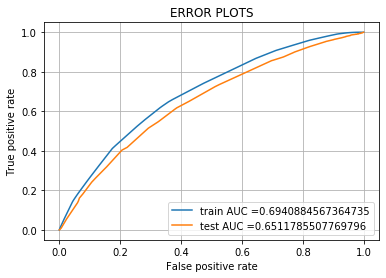

In [0]:
from sklearn.metrics import roc_curve, auc


DT_model_1 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
DT_model_1.fit(X_tr_tfidf, y_train)


y_train_pred = DT_model_1.predict_proba( X_tr_tfidf)    
y_test_pred = DT_model_1.predict_proba( X_te_tfidf)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:, 1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:, 1])

auc_train_bow=auc(train_fpr, train_tpr)
auc_test_bow=auc(test_fpr, test_tpr)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [0]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

In [0]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [0]:
tr_thresholds

array([1.98194946, 0.98194946, 0.97222222, 0.96595745, 0.9571899 ,
       0.95061728, 0.94177262, 0.94089457, 0.93229572, 0.93131313,
       0.925     , 0.92372564, 0.91991925, 0.90776699, 0.90730665,
       0.90322581, 0.9       , 0.89534884, 0.89418778, 0.88914819,
       0.88740458, 0.88337433, 0.87842466, 0.86340085, 0.86139535,
       0.8539152 , 0.84808454, 0.84583333, 0.82145879, 0.81871345,
       0.81428571, 0.79879276, 0.79626556, 0.79319204, 0.76646707,
       0.76625387, 0.69859155, 0.69818913, 0.69308943, 0.67914439,
       0.67911041, 0.678125  , 0.67272727, 0.64705882, 0.63636364,
       0.63216266, 0.62962963, 0.61458333, 0.57777778, 0.57692308,
       0.56483516, 0.52699784, 0.50588235, 0.5       , 0.47572816,
       0.46666667, 0.44444444, 0.4375    , 0.42857143, 0.41935484,
       0.41666667, 0.4       , 0.38461538, 0.375     , 0.36363636,
       0.35294118, 0.34782609, 0.34482759, 0.33333333, 0.31578947,
       0.3125    , 0.29411765, 0.28571429, 0.27586207, 0.25   

the maximum value of tpr*(1-fpr) 0.41545010959417156 for threshold 0.855
Train confusion matrix


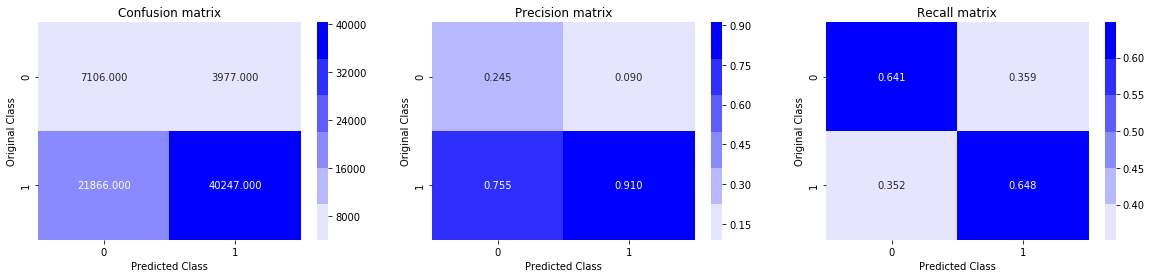

Test confusion matrix


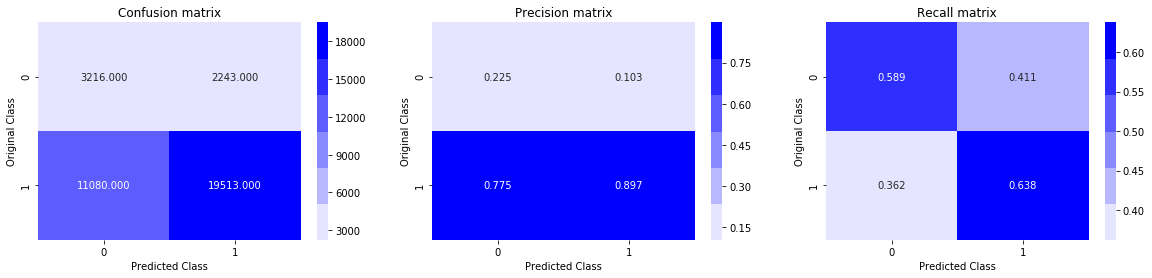

In [0]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
plot_confusion_matrix(y_train, predict_with_best_t(y_train_pred[:, 1], best_t))
print("Test confusion matrix")
plot_confusion_matrix(y_test, predict_with_best_t(y_test_pred[:, 1], best_t))

Getting all the False-Positive points

In [0]:
X_train_fp_tfidf=X_train[(y_train==0) & (y_train_pred[:, 1]>=best_t)]
X_train_fp_tfidf.to_csv("X_train_fp.csv")

In [0]:
X_train_fp_tfidf.shape

(3977, 9)

In [0]:
X_train_fp_tfidf.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price,project_title
2187,il,mrs,grades_prek_2,8,literacy_language math_science,literacy mathematics,would not rather learn games i believe student...,252.71,notes one place
62786,tx,mrs,grades_3_5,1,literacy_language,literacy,i reading intervention teacher large title 1 c...,181.10,read ride


In [0]:
X_test_fp_tfidf=X_test[(y_test==0) & (y_test_pred[:, 1]>=best_t)]
X_test_fp_tfidf.to_csv("X_test_fp.csv")

In [0]:
from google.colab import files
files.download('X_train_fp.csv')
files.download('X_test_fp.csv')

In [0]:
X_test_fp_tfidf.shape

(2243, 9)

In [0]:
X_test_fp_tfidf.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price,project_title
60745,nc,mrs,grades_3_5,3,math_science literacy_language,health_lifescience literature_writing,every student deserves chance learn with many ...,857.73,unleash inner inventor
3110,ms,mrs,grades_3_5,0,literacy_language specialneeds,literature_writing specialneeds,in classroom engage many small group activitie...,192.27,big books story telling small learners


Word Cloud for essay in False-positive train points

In [0]:
import pandas as pd

import matplotlib.pyplot as plt
X_train_fp=pd.read_csv("gdrive/My Drive/Assignment-5/X_train_fp.csv")
X_test_fp=pd.read_csv("gdrive/My Drive/Assignment-5/X_test_fp.csv")



In [0]:
from wordcloud import WordCloud
words=" "
for sentence in X_train_fp["essay"]:
    for word in sentence.split():
        if word not in words:
            words+=word+" "

Word Cloud for essay in False-positive train points


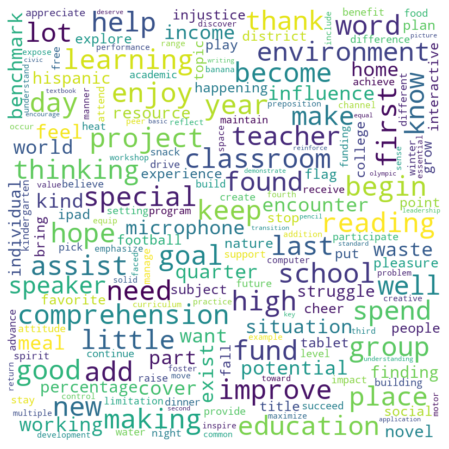

In [0]:
wc = WordCloud(width = 800, height = 800,background_color ='white', max_font_size=50,min_font_size = 10)
wc.generate(words)
print ("Word Cloud for essay in False-positive train points")
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


Word Cloud for essay in False-positive test points

Word Cloud for essay in False-positive train points


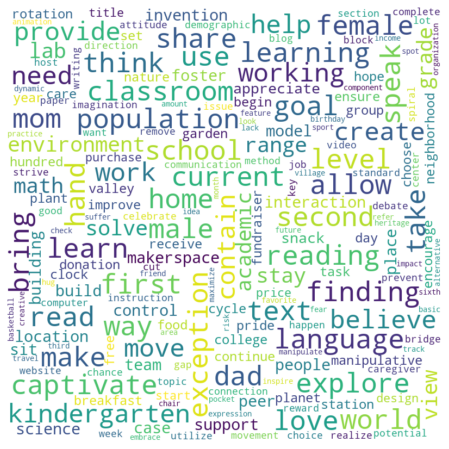

In [0]:
from wordcloud import WordCloud
words=" "
for sentence in X_test_fp["essay"]:
    for word in sentence.split():
        if word not in words:
            words+=word+" "

wc = WordCloud(width = 800, height = 800,background_color ='white', max_font_size=50,min_font_size = 10)
wc.generate(words)
print ("Word Cloud for essay in False-positive train points")
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

BOXPLOTS for False-positive datapoints on price

TRAIN False positives

In [0]:
X_train_fp_tfidf.describe()

,teacher_number_of_previously_posted_projects,price
count,3977.000000,3977.000000
mean,14.105607,247.783357
std,25.558380,340.448104
min,0.000000,1.970000
25%,1.000000,78.280000
50%,6.000000,165.560000
75%,15.000000,301.730000
max,322.000000,8719.690000


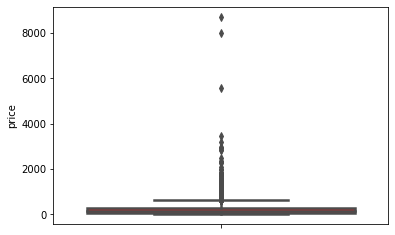

In [0]:
import seaborn as sb
sb.boxplot(y="price",data=X_train_fp_tfidf,linewidth=2.5,color="red")
plt.show()

TEST Falsepositives

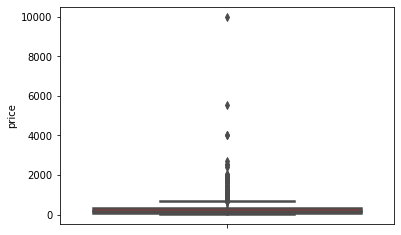

In [0]:
import seaborn as sb
sb.boxplot(y="price",data=X_test_fp_tfidf,linewidth=2.5,color="red")
plt.show()

PDF of teacher_number_of_previously_posted_projects of these false positive data points

For train data

In [0]:
counts,bin_edges=np.histogram(X_train_fp_tfidf["teacher_number_of_previously_posted_projects"],bins=20,density=True)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)

[7.69927081e-01 1.17928086e-01 4.70203671e-02 1.93613276e-02
 1.50867488e-02 8.04626603e-03 7.29192859e-03 4.02313301e-03
 3.52024139e-03 2.76590395e-03 1.00578325e-03 1.76012069e-03
 7.54337440e-04 7.54337440e-04 0.00000000e+00 2.51445813e-04
 2.51445813e-04 0.00000000e+00 0.00000000e+00 2.51445813e-04]
[  0.   16.1  32.2  48.3  64.4  80.5  96.6 112.7 128.8 144.9 161.  177.1
 193.2 209.3 225.4 241.5 257.6 273.7 289.8 305.9 322. ]


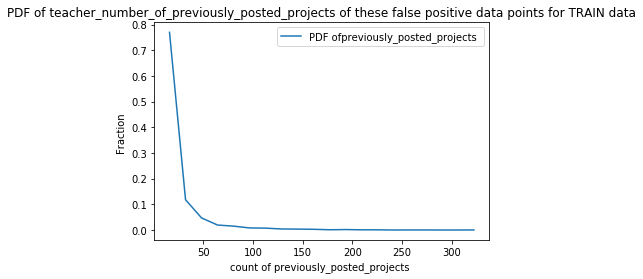

In [0]:
plt.plot(bin_edges[1:] ,pdf,label='PDF ofpreviously_posted_projects ')

plt.legend()
plt.title('PDF of teacher_number_of_previously_posted_projects of these false positive data points for TRAIN data')
plt.xlabel('count of previously_posted_projects ')
plt.ylabel('Fraction ')
plt.show()

[0.76992708 0.88785517 0.93487553 0.95423686 0.96932361 0.97736988
 0.98466181 0.98868494 0.99220518 0.99497108 0.99597687 0.99773699
 0.99849133 0.99924566 0.99924566 0.99949711 0.99974855 0.99974855
 0.99974855 1.        ]


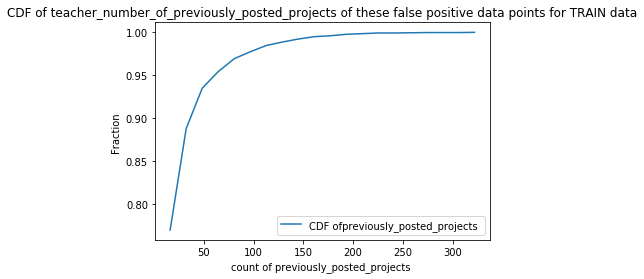

In [0]:
cdf=np.cumsum(pdf)
print(cdf)
plt.plot(bin_edges[1:],cdf,label='CDF ofpreviously_posted_projects ')
plt.legend()
plt.title('CDF of teacher_number_of_previously_posted_projects of these false positive data points for TRAIN data')
plt.xlabel('count of previously_posted_projects ')
plt.ylabel('Fraction ')
plt.show()

For Test Data

In [0]:
counts,bin_edges=np.histogram(X_test_fp_tfidf["teacher_number_of_previously_posted_projects"],bins=20,density=True)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)

[7.99821667e-01 1.11903700e-01 4.01248328e-02 1.87249220e-02
 8.47079804e-03 5.34997771e-03 6.24164066e-03 4.01248328e-03
 1.33749443e-03 8.91662951e-04 8.91662951e-04 1.33749443e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.45831476e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.45831476e-04]
[  0.    17.15  34.3   51.45  68.6   85.75 102.9  120.05 137.2  154.35
 171.5  188.65 205.8  222.95 240.1  257.25 274.4  291.55 308.7  325.85
 343.  ]


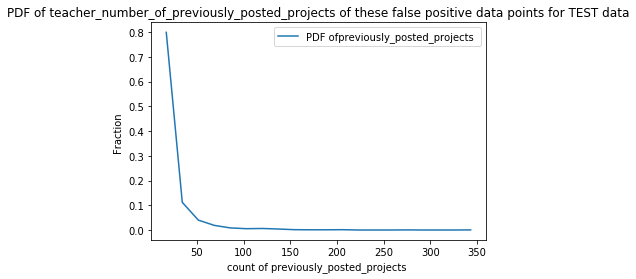

In [0]:
plt.plot(bin_edges[1:] ,pdf,label='PDF ofpreviously_posted_projects ')

plt.legend()
plt.title('PDF of teacher_number_of_previously_posted_projects of these false positive data points for TEST data')
plt.xlabel('count of previously_posted_projects ')
plt.ylabel('Fraction ')
plt.show()

[0.79982167 0.91172537 0.9518502  0.97057512 0.97904592 0.9843959
 0.99063754 0.99465002 0.99598752 0.99687918 0.99777084 0.99910834
 0.99910834 0.99910834 0.99910834 0.99955417 0.99955417 0.99955417
 0.99955417 1.        ]


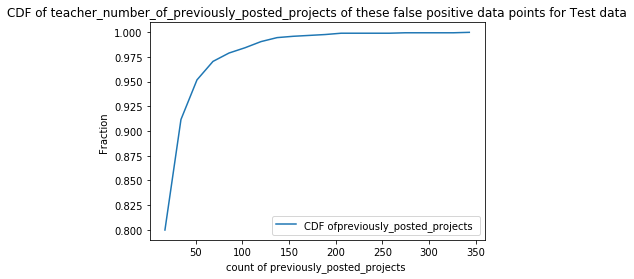

In [0]:
cdf=np.cumsum(pdf)
print(cdf)
plt.plot(bin_edges[1:],cdf,label='CDF ofpreviously_posted_projects ')
plt.legend()
plt.title('CDF of teacher_number_of_previously_posted_projects of these false positive data points for Test data')
plt.xlabel('count of previously_posted_projects ')
plt.ylabel('Fraction ')
plt.show()

MODEL-2 using w2v-essay n title **features**

In [0]:
param_dist={'max_depth': [1, 5, 10, 50] ,
            'min_samples_split':[5, 10, 100, 500]
            }
clf=DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,
                           random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None)
rf_random =GridSearchCV(clf, param_grid=param_dist,
                                   cv=3,scoring='roc_auc',return_train_score=True)

rf_random.fit(X_tr_w2v,y_train)
results = pd.DataFrame.from_dict(rf_random.cv_results_)
results.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,6.382792,0.045343,0.099324,0.002952,1,5,"{'max_depth': 1, 'min_samples_split': 5}",0.560782,0.558366,0.560638,0.559929,0.001106,10,0.560065,0.562862,0.562862,0.56193,0.001319


In [0]:
enable_plotly_in_cell()
z1=list(rf_random.cv_results_['mean_train_score'])
y1=list(rf_random.cv_results_['param_min_samples_split'].data)
x1=list(rf_random.cv_results_['param_max_depth'].data)

y2=list(rf_random.cv_results_['param_min_samples_split'].data)
x2=list(rf_random.cv_results_['param_max_depth'].data)

z2=list(rf_random.cv_results_['mean_test_score'])

trace1 = go.Scatter3d(x=x1,y=y1,z=z1, name = 'train')
trace2 = go.Scatter3d(x=x2,y=y2,z=z2, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='min_sample_split'),
        yaxis = dict(title='max_depth'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')

Output hidden; open in https://colab.research.google.com to view.

In [0]:
rf_random.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

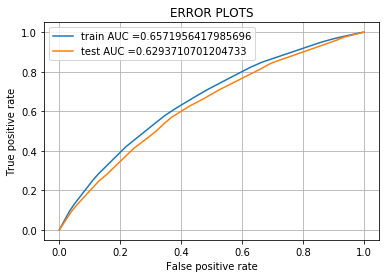

In [0]:
from sklearn.metrics import roc_curve, auc


DT_model_2 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
DT_model_2.fit(X_tr_w2v, y_train)


y_train_pred = DT_model_2.predict_proba( X_tr_w2v)    
y_test_pred = DT_model_2.predict_proba( X_te_w2v)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:, 1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:, 1])

auc_train_bow=auc(train_fpr, train_tpr)
auc_test_bow=auc(test_fpr, test_tpr)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [0]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

the maximum value of tpr*(1-fpr) 0.37969852628023104 for threshold 0.851
Train confusion matrix


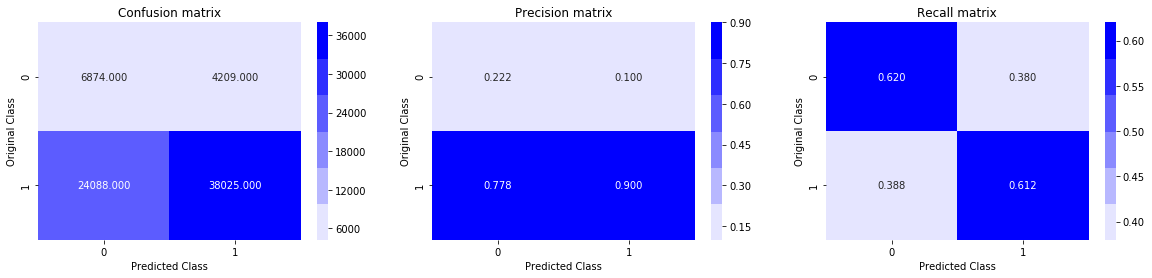

Test confusion matrix


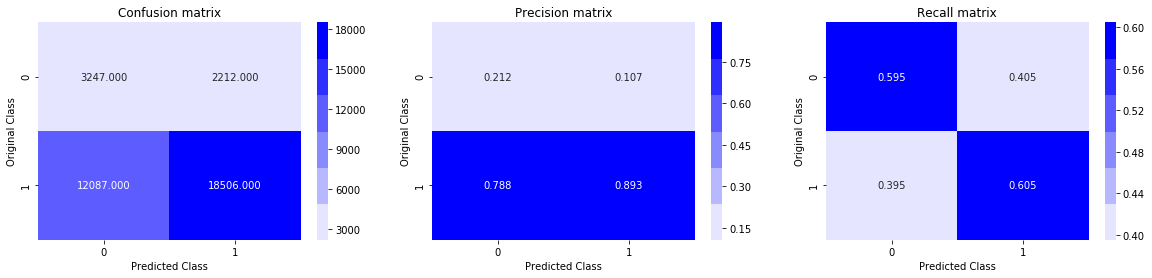

In [0]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
plot_confusion_matrix(y_train, predict_with_best_t(y_train_pred[:, 1], best_t))
print("Test confusion matrix")
plot_confusion_matrix(y_test, predict_with_best_t(y_test_pred[:, 1], best_t))

False-positives

In [0]:
X_train_fp_w2v=X_train[(y_train==0) & (y_train_pred[:, 1]>=best_t)]
X_train_fp_w2v.to_csv("X_train_fp_w2v.csv")

In [0]:
X_test_fp_w2v=X_test[(y_test==0) & (y_test_pred[:, 1]>=best_t)]
X_test_fp_w2v.to_csv("X_test_fp_w2v.csv")

In [0]:
from google.colab import files
files.download('X_train_fp_w2v.csv')
files.download('X_test_fp_w2v.csv')

wordcloud for false positive datapoints of TF-idf-w2v

In [0]:
X_train_fp_w2v=pd.read_csv("gdrive/My Drive/Assignment-5/X_train_fp_w2v.csv")
X_test_fp_w2v=pd.read_csv("gdrive/My Drive/Assignment-5/X_test_fp_w2v.csv")

For words of essay in Train data

```
# This is formatted as code
```



Word Cloud for essay


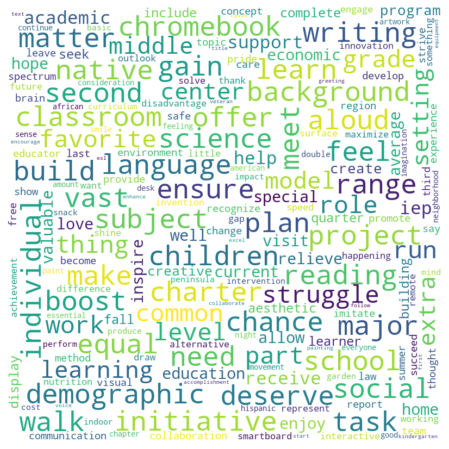

In [0]:
from wordcloud import WordCloud
words=" "
for sentence in X_train_fp_w2v["essay"]:
    for word in sentence.split():
        if word not in words:
            words+=word+" "
wc = WordCloud(width = 800, height = 800,background_color ='white', max_font_size=50,min_font_size = 10)
wc.generate(words)
print ("Word Cloud for essay")
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

For words of essay in Test data

In [0]:
from wordcloud import WordCloud
words=" "
for sentence in X_test_fp_w2v["essay"]:
    for word in sentence.split():
        if word not in words:
            words+=word+" "

Word Cloud for essay


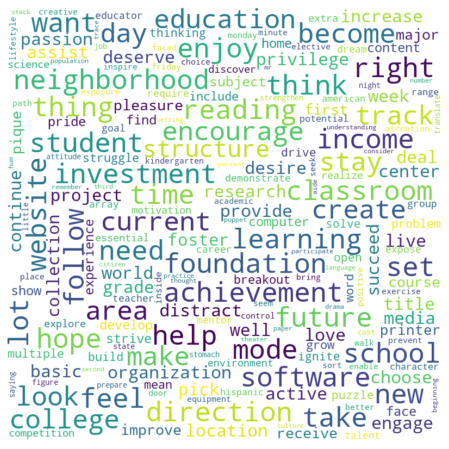

In [0]:
wc = WordCloud(width = 800, height = 800,background_color ='white', max_font_size=50,min_font_size = 10)
wc.generate(words)
print ("Word Cloud for essay")
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

BOXPLOTS for teacher_number_of_previously_posted_projects of False Positive datapoints


```
# This is formatted as code
```



Train False-positives

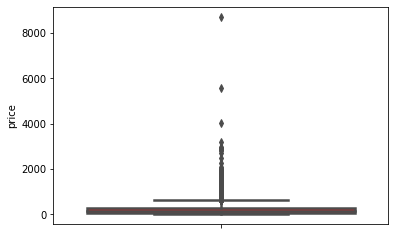

In [0]:
import seaborn as sb
sb.boxplot(y="price",data=X_train_fp_w2v,linewidth=2.5,color="red")
plt.show()

Test False-positives

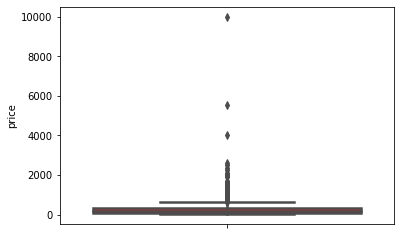

In [0]:
import seaborn as sb
sb.boxplot(y="price",data=X_test_fp_w2v,linewidth=2.5,color="red")
plt.show()

PDF of teacher_number_of_previously_posted_projects of these false positive data points

TRAIN

In [0]:
counts,bin_edges=np.histogram(X_train_fp_w2v["teacher_number_of_previously_posted_projects"],bins=20,density=True)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)

[8.34402471e-01 8.88572107e-02 3.30244714e-02 1.37799952e-02
 9.97861725e-03 4.75172250e-03 5.93965312e-03 3.32620575e-03
 1.90068900e-03 1.66310287e-03 9.50344500e-04 4.75172250e-04
 0.00000000e+00 4.75172250e-04 0.00000000e+00 2.37586125e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.37586125e-04]
[  0.   16.1  32.2  48.3  64.4  80.5  96.6 112.7 128.8 144.9 161.  177.1
 193.2 209.3 225.4 241.5 257.6 273.7 289.8 305.9 322. ]


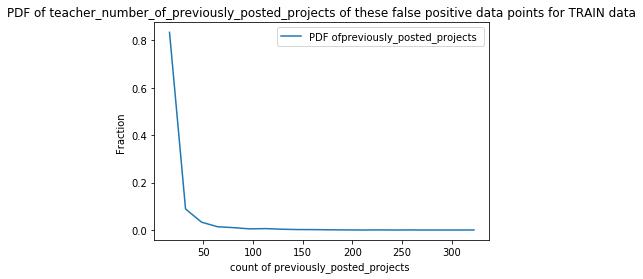

In [0]:
plt.plot(bin_edges[1:] ,pdf,label='PDF ofpreviously_posted_projects ')

plt.legend()
plt.title('PDF of teacher_number_of_previously_posted_projects of these false positive data points for TRAIN data')
plt.xlabel('count of previously_posted_projects ')
plt.ylabel('Fraction ')
plt.show()

TEST

In [0]:
counts,bin_edges=np.histogram(X_test_fp_w2v["teacher_number_of_previously_posted_projects"],bins=20,density=True)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)

[8.47197107e-01 8.90596745e-02 2.98372514e-02 1.40144665e-02
 6.78119349e-03 2.71247740e-03 4.52079566e-03 1.80831826e-03
 1.80831826e-03 0.00000000e+00 1.35623870e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.52079566e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.52079566e-04]
[  0.    17.25  34.5   51.75  69.    86.25 103.5  120.75 138.   155.25
 172.5  189.75 207.   224.25 241.5  258.75 276.   293.25 310.5  327.75
 345.  ]


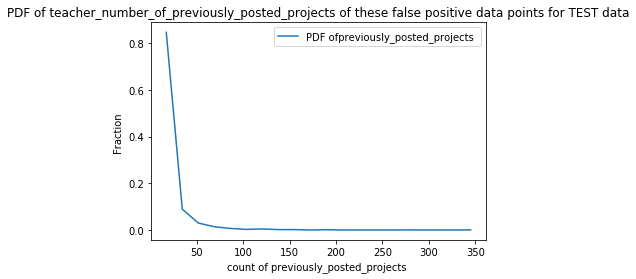

In [0]:
plt.plot(bin_edges[1:] ,pdf,label='PDF ofpreviously_posted_projects ')

plt.legend()
plt.title('PDF of teacher_number_of_previously_posted_projects of these false positive data points for TEST data')
plt.xlabel('count of previously_posted_projects ')
plt.ylabel('Fraction ')

plt.show()


<h2>1.6 Getting top features using `feature_importances_`</h2>

In [0]:
from sklearn.metrics import roc_curve, auc


DT_model_3 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
DT_model_3.fit(X_tr_tfidf, y_train)


y_train_pred = DT_model_3.predict_proba( X_tr_tfidf)    
y_test_pred = DT_model_3.predict_proba( X_te_tfidf)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:, 1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:, 1])

auc_train_bow=auc(train_fpr, train_tpr)
auc_test_bow=auc(test_fpr, test_tpr)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [0]:
def feature_names(x_train):
  lst=[]
  essay_vec = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
  essay_vec.fit(X_train['essay'].values)
  lst.append(essay_vec.get_feature_names())

  title_vec = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
  title_vec.fit(X_train['project_title'].values)
  lst.append(title_vec.get_feature_names())

  state_vec = CountVectorizer()
  state_vec.fit(X_train['school_state'].values)
  lst.append(state_vec.get_feature_names())

  teacher_vec = CountVectorizer()
  teacher_vec.fit(X_train['teacher_prefix'].values)
  lst.append(teacher_vec.get_feature_names())

  grade_vec = CountVectorizer()
  grade_vec.fit(X_train['project_grade_category'].values)
  lst.append(grade_vec.get_feature_names())

  cat_vec=CountVectorizer()
  cat_vec.fit(X_train['clean_categories'].values)
  lst.append(cat_vec.get_feature_names())

  sub_cat_vec=CountVectorizer()
  sub_cat_vec.fit(X_train['clean_subcategories'].values)
  lst.append(sub_cat_vec.get_feature_names())
 
  x=['price','teacher_number_of_previously_posted_projects']
  lst.append(x)

  return lst

In [0]:
feature_name=feature_names(X_train)

In [0]:
feature_id=[]
for list in feature_name:
  for ele in list:
    feature_id.append(ele)



In [0]:
len(feature_id)

9981

In [0]:
feat_imp=(dict(zip(feature_id, DT_model_3.feature_importances_)))
feat_imp['price']

0.025150747893434078

In [0]:
feat_drop=[]
for feature,imp in feat_imp.items():
  if imp==0:
    feat_drop.append(feature)


In [0]:
len(feat_drop)

6094

In [0]:
x_tr=X_tr_tfidf.toarray()

In [0]:
x_te=X_te_tfidf.toarray()

In [0]:
X_train_new=pd.DataFrame(data=x_tr,columns=feature_id)
X_train_new.shape

(73196, 9981)

In [0]:
X_test_new=pd.DataFrame(data=x_te,columns=feature_id)
X_test_new.shape

(36052, 9981)

In [0]:
X_train_new.head()

,000,10,100,100 free,100 percent,100 students,100 students receive,100 students receive free,11,12,12th,13,14,15,16,17,18,19,1st,1st grade,20,2016,2017,21,21st,21st century,21st century learners,21st century learning,21st century skills,22,23,24,25,25 students,26,28,2nd,2nd grade,2nd graders,30,...,care_hunger,health_sports,history_civics,literacy_language,math_science,music_arts,specialneeds,warmth,appliedsciences,care_hunger,charactereducation,civics_government,college_careerprep,communityservice,earlydevelopment,economics,environmentalscience,esl,extracurricular,financialliteracy,foreignlanguages,gym_fitness,health_lifescience,health_wellness,history_geography,literacy,literature_writing,mathematics,music,nutritioneducation,other,parentinvolvement,performingarts,socialsciences,specialneeds,teamsports,visualarts,warmth,price,teacher_number_of_previously_posted_projects
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003759,0.694013
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.069312,0.069468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.044447,0.004435
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014836,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.038903,0.008869
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.016072,0.002217


In [0]:
X_test_new.head()

,000,10,100,100 free,100 percent,100 students,100 students receive,100 students receive free,11,12,12th,13,14,15,16,17,18,19,1st,1st grade,20,2016,2017,21,21st,21st century,21st century learners,21st century learning,21st century skills,22,23,24,25,25 students,26,28,2nd,2nd grade,2nd graders,30,...,care_hunger,health_sports,history_civics,literacy_language,math_science,music_arts,specialneeds,warmth,appliedsciences,care_hunger,charactereducation,civics_government,college_careerprep,communityservice,earlydevelopment,economics,environmentalscience,esl,extracurricular,financialliteracy,foreignlanguages,gym_fitness,health_lifescience,health_wellness,history_geography,literacy,literature_writing,mathematics,music,nutritioneducation,other,parentinvolvement,performingarts,socialsciences,specialneeds,teamsports,visualarts,warmth,price,teacher_number_of_previously_posted_projects
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.006323,0.002217
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.049533,0.099778
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.027963,0.002217
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005748,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.047113,0.000000


In [0]:

X_train_new_1=X_train_new.drop(feat_drop,axis=1)
del X_train_new

In [0]:
X_test_new_1=X_test_new.drop(feat_drop,axis=1)
del X_test_new

In [0]:
X_train_new_1.shape

(73196, 2257)

In [0]:
X_test_new_1.shape

(36052, 2257)

In [0]:
del X_train, X_test

In [0]:
y_train.shape

(73196,)

**MODEL-3**

Training on X_train_new_1,X_test_new_1 are our new train and text data files with only non-zero feature importances

Training Decision-Tree on top of this

In [0]:
param_dist={'max_depth': [1, 5, 10, 50] ,
            'min_samples_split':[5, 10, 100, 500]
            }
clf=DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,
                           random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None)
rf_random =GridSearchCV(clf, param_grid=param_dist,
                                   cv=3,scoring='roc_auc',return_train_score=True)

rf_random.fit(X_train_new_1,y_train)
results = pd.DataFrame.from_dict(rf_random.cv_results_)
results.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.712081,0.063987,0.168808,0.053755,1,5,"{'max_depth': 1, 'min_samples_split': 5}",0.551586,0.555193,0.552056,0.552945,0.001601,13,0.556959,0.552986,0.552918,0.554288,0.001889


In [0]:
enable_plotly_in_cell()
z1=(rf_random.cv_results_['mean_train_score'])
y1=(rf_random.cv_results_['param_min_samples_split'].data)
x1=(rf_random.cv_results_['param_max_depth'].data)

y2=(rf_random.cv_results_['param_min_samples_split'].data)
x2=(rf_random.cv_results_['param_max_depth'].data)

z2=(rf_random.cv_results_['mean_test_score'])

trace1 = go.Scatter3d(x=x1,y=y1,z=z1, name = 'train')
trace2 = go.Scatter3d(x=x2,y=y2,z=z2, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='min_sample_split'),
        yaxis = dict(title='max_depth'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')

Output hidden; open in https://colab.research.google.com to view.

In [0]:
rf_random.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

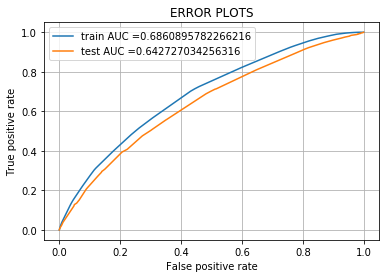

In [0]:
from sklearn.metrics import roc_curve, auc


DT_model_4 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
DT_model_4.fit(X_train_new_1, y_train)


y_train_pred = DT_model_4.predict_proba( X_train_new_1)    
y_test_pred = DT_model_4.predict_proba( X_test_new_1)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:, 1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:, 1])

auc_train_bow=auc(train_fpr, train_tpr)
auc_test_bow=auc(test_fpr, test_tpr)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.398976535068221 for threshold 0.858
Train confusion matrix


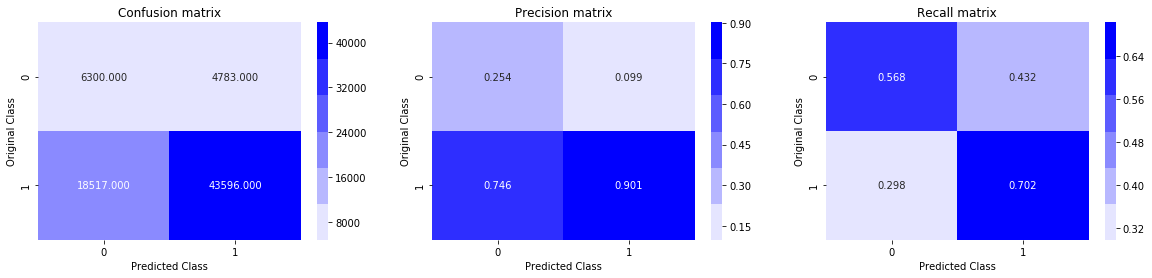

Test confusion matrix


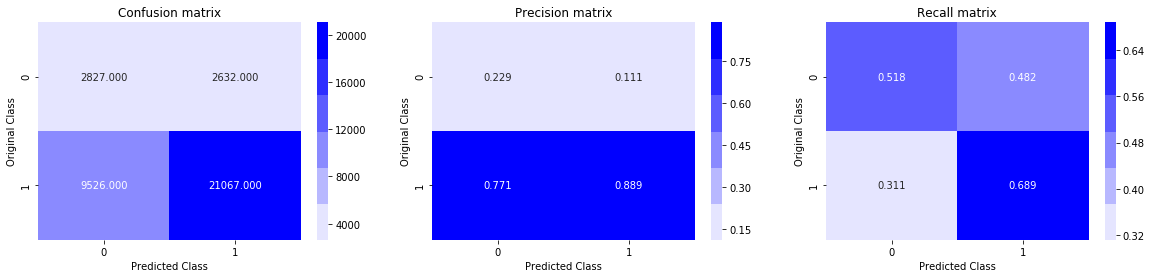

In [0]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
plot_confusion_matrix(y_train, predict_with_best_t(y_train_pred[:, 1], best_t))
print("Test confusion matrix")
plot_confusion_matrix(y_test, predict_with_best_t(y_test_pred[:, 1], best_t))

In [0]:
X_train_fp_new=X_train_new_1[(y_train==0) & (y_train_pred[:, 1]>=best_t)]
X_train_fp_new.to_csv("X_train_fp_new.csv")

In [0]:
X_test_fp_new=X_test_new_1[(y_test==0) & (y_test_pred[:, 1]>=best_t)]
X_test_fp_new.to_csv("X_test_fp_new.csv")

BOXPLOTS for teacher_number_of_previously_posted_projects of False Positive datapoints

Train

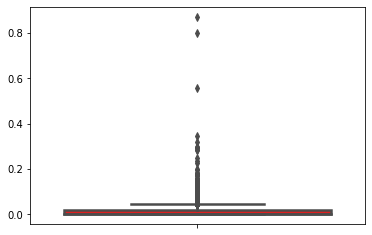

In [0]:
import seaborn as sb
sb.boxplot(y="price",data=X_train_fp_new,linewidth=2.5,color="red")
plt.show()

Test

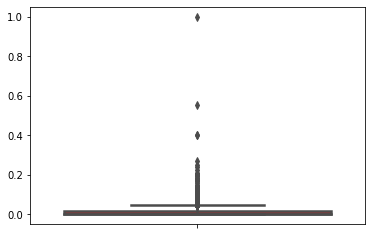

In [0]:
import seaborn as sb
sb.boxplot(y="price",data=X_test_fp_new,linewidth=2.5,color="red")
plt.show()

PDF of teacher_number_of_previously_posted_projects of these false positive data points

Train

In [0]:
counts,bin_edges=np.histogram(X_train_fp_new["teacher_number_of_previously_posted_projects"],bins=20,density=True)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)

[8.08488396e-01 9.88919088e-02 3.84695798e-02 1.65168304e-02
 1.23353544e-02 6.69036170e-03 5.64499268e-03 3.55425465e-03
 2.71795944e-03 2.09073803e-03 1.04536902e-03 1.67259042e-03
 6.27221409e-04 6.27221409e-04 0.00000000e+00 2.09073803e-04
 2.09073803e-04 0.00000000e+00 0.00000000e+00 2.09073803e-04]
[0.         0.03569845 0.0713969  0.10709534 0.14279379 0.17849224
 0.21419069 0.24988914 0.28558758 0.32128603 0.35698448 0.39268293
 0.42838137 0.46407982 0.49977827 0.53547672 0.57117517 0.60687361
 0.64257206 0.67827051 0.71396896]


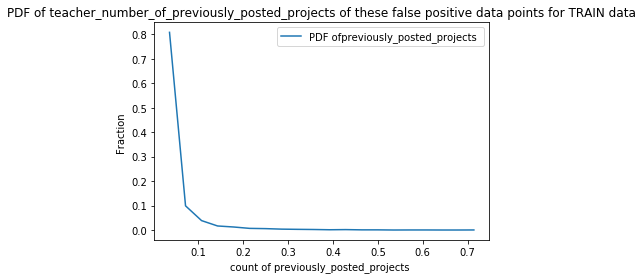

In [0]:
plt.plot(bin_edges[1:] ,pdf,label='PDF ofpreviously_posted_projects ')

plt.legend()
plt.title('PDF of teacher_number_of_previously_posted_projects of these false positive data points for TRAIN data')
plt.xlabel('count of previously_posted_projects ')
plt.ylabel('Fraction ')
plt.show()

Test

In [0]:
counts,bin_edges=np.histogram(X_test_fp_new["teacher_number_of_previously_posted_projects"],bins=20,density=True)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)

[8.31306991e-01 9.49848024e-02 3.34346505e-02 1.55775076e-02
 6.83890578e-03 4.55927052e-03 5.31914894e-03 3.41945289e-03
 1.13981763e-03 7.59878419e-04 7.59878419e-04 1.13981763e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.79939210e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.79939210e-04]
[0.         0.03802661 0.07605322 0.11407982 0.15210643 0.19013304
 0.22815965 0.26618625 0.30421286 0.34223947 0.38026608 0.41829268
 0.45631929 0.4943459  0.53237251 0.57039911 0.60842572 0.64645233
 0.68447894 0.72250554 0.76053215]


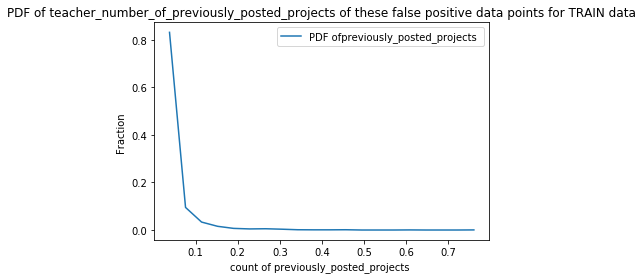

In [0]:
plt.plot(bin_edges[1:] ,pdf,label='PDF ofpreviously_posted_projects ')

plt.legend()
plt.title('PDF of teacher_number_of_previously_posted_projects of these false positive data points for TRAIN data')
plt.xlabel('count of previously_posted_projects ')
plt.ylabel('Fraction ')
plt.show()

In [0]:
from google.colab import files
files.download('X_train_fp_new.csv')
files.download('X_test_fp_new.csv')

<h1>2. Summary</h1>

In [0]:
x=pd.DataFrame({'vectorizer':['TFIDF','W2V','TF-IDF-non-zero-imp-features'],
                'Model':['Decision trees','Decision trees','Decision trees'],
                'max_depth':[10,5,10],
                'min_Sample_split':[500,100,500],
                'Train_AUC':[0.694088,0.657195,0.686089],
                'Test_AUC':[0.651178,0.629371,0.642727]})
x

,vectorizer,Model,max_depth,min_Sample_split,Train_AUC,Test_AUC
0,TFIDF,Decision trees,10,500,0.694088,0.651178
1,W2V,Decision trees,5,100,0.657195,0.629371
2,TF-IDF-non-zero-imp-features,Decision trees,10,500,0.686089,0.642727
